**_Categorical variables are those values which are selected from a group of categories or
labels. For example, the variable Gender with the values of male or female is categorical,
and so is the variable marital status with the values of never married, married, divorced,
or widowed. In some categorical variables, the labels have an intrinsic order, for example,
in the variable Student's grade, the values of A, B, C, or Fail are ordered, A being the
highest grade and Fail the lowest. These are called ordinal categorical variables. Variables
in which the categories do not have an intrinsic order are called nominal categorical
variables, such as the variable City, with the values of London, Manchester, Bristol, and so
on._**


Categorical Variables are often encoded as strings which scikit-learn does not understands. So, we need to replace those strings with numbers. This is known as `Categorical Encoding`

- Creating binary variables through one-hot encoding
- Performing one-hot encoding of frequent categories
- Replacing categories with ordinal numbers
- Replacing categories with counts or frequency of observations
- Encoding with integers in an ordered manner
- Encoding with the mean of the target
- Encoding with the Weight of Evidence
- Grouping rare or infrequent categories
- Performing binary encoding
- Performing feature hashing

In [2]:
import random
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('crx.data', header=None)

In [21]:
cols = ['A'+str(s) for s in range(1, 17)]
data.columns = cols
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0.0,+


In [22]:
# for i in data.columns:        # Data has '?' at someplaces
#    print(i, data[i].unique())

In [23]:
# Replacing ? with np.nan
data.replace('?', np.nan, inplace=True)

In [24]:
# Re-casting
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype(float)

In [25]:
# Recoding the target variable A16 as binary
data['A16'] = data['A16'].map({'+':1, '-':0})

In [27]:
# Making a list of categorical and numerical columns in the dataset
cat_cols = [c for c in data.columns if data[c].dtype == 'O']
num_cols = [c for c in data.columns if data[c].dtype != 'O']

In [28]:
cat_cols, num_cols

(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'],
 ['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16'])

In [29]:
# Filling missing data
data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna('Missing')

In [30]:
# Saving the data
data.to_csv('creditAppUCI_1.csv', index=False)

## Creating binary variables through one-hot encoding


In one-hot encoding, we represent a categorical variable as a group of binary variables,
where each binary variable represents one category. The binary variable indicates whether
the category is present in an observation (1) or not (0). 

> A categorical variable with k unique categories can be encoded in k-1 binary variables. For
Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only
one binary variable (k - 1 = 1) to capture all of the information. 


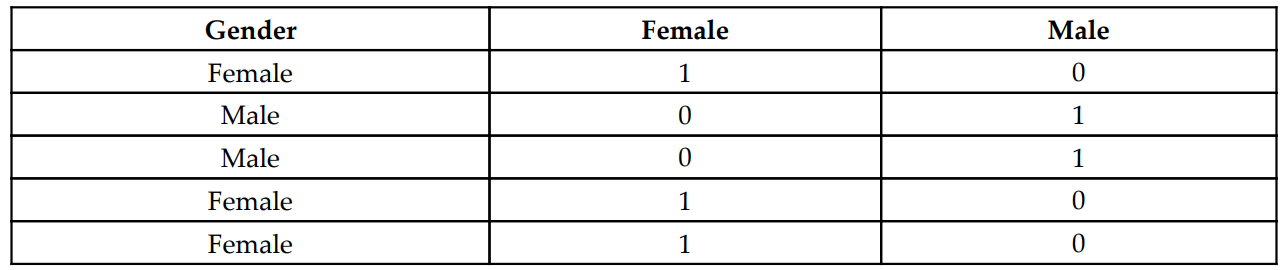

> For the color variable, which
has three categories (k=3; red, blue, and green), we need to create two (k - 1 = 2) binary
variables to capture all the information, so that the following occurs:
- If the observation is red, it will be captured by the variable red (red = 1, blue = 0).
- If the observation is blue, it will be captured by the variable blue (red = 0, blue =
1).
- If the observation is green, it will be captured by the combination
of red and blue (red = 0, blue = 0).


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [33]:
data_one = pd.read_csv('creditAppUCI_1.csv')

In [34]:
data_one.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0.0,1


In [39]:
# Applying the train test split 
x_train, x_test, y_train, y_test = train_test_split(data_one.drop(labels=['A16'], axis=1), data_one['A16'],
                                                    test_size=0.3, random_state=0)

In [40]:
# Inspecting the unique categories A4 in training set
x_train['A4'].unique()

array(['u', 'y', 'Missing', 'l'], dtype=object)

In [41]:
# Let's encode A4 into k-1 binary variables using pandas and then inspect the first five rows of the resulting dataframe:

In [43]:
# get_dummies() gives indicator functions for respective label of the categorical variable
temp = pd.get_dummies(x_train['A4'], drop_first=True)
# To encode the variable into k binaries, use instead drop_first=False.

In [44]:
temp.head()   # 4-1 columns to capture all the data of A4

,l,u,y
596,0,1,0
303,0,1,0
204,0,0,1
351,0,0,1
118,0,1,0


In [45]:
cat_cols   # List of all categorical variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [46]:
# Let's encode all the categorical variables and get a new df
x_train_enc = pd.get_dummies(x_train[cat_cols], drop_first=True)
x_test_enc = pd.get_dummies(x_test[cat_cols], drop_first=True)

In [47]:
x_train_enc.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
596,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,1,1,0,0
303,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
204,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
351,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0


**If there are more categories in the train set than in
the test set, get_dummies() will return more columns in the transformed
train set than in the transformed test set.**

### Encoding using OneHotEncoder

In [48]:
# Let's create a OneHotEncoder transformer that encodes into k-1 binary variables and returns a NumPy array

In [49]:
encoder = OneHotEncoder(categories='auto', sparse=False, drop='first')

In [53]:
encoder.fit(x_train[cat_cols])

OneHotEncoder(drop='first', sparse=False)

Scikit-learn's OneHotEncoder() function will only encode the categories
learned from the train set. If there are new categories in the test set, we
can instruct the encoder to ignore them or to return an error with the
handle_unknown='ignore' argument or
the handle_unknown='error' argument, respectively.


In [54]:
x_train_enc = encoder.transform(x_train[cat_cols])  # returns numpy arrays
x_test_enc = encoder.transform(x_test[cat_cols])

Unfortunately, the feature names are not preserved in the NumPy array,
therefore, identifying which feature was derived from which variable is
not straightforward. bcoz while transforming the array back to the df we need the column names which we can't have bcoz the encoder creates new (k-1) columns for every feature with k categories

In [55]:
x_train_enc

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

## Performing one-hot encoding of frequent categories


_Sometimes features have so many categories that the OneHotEncoder will end expanding the no. of columns so much that it becomes very difficult to handle the dataset._
- This problem can be handled by encoding only the frequent categories of a feature

**We're using feature_engine's OneHotCategoricalEncoder to make things simple**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder

In [6]:
data = pd.read_csv('creditAppUCI_1.csv')

In [7]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0.0,1


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(labels='A16', axis=1), data['A16'], 
                                                    test_size=0.3, random_state=0)

In [9]:
# Creating OneHotEncoder for the top five frequent categories of the features A6 & A7
one_enc = OneHotEncoder(top_categories=5, variables=['A6', 'A7'], drop_last=False)

In [10]:
# Fitting the encoder
one_enc.fit(x_train)

OneHotEncoder(top_categories=5, variables=['A6', 'A7'])

In [12]:
one_enc.encoder_dict_    # Top 5 features for A6 & A7

{'A6': ['c', 'q', 'w', 'i', 'ff'], 'A7': ['v', 'h', 'ff', 'bb', 'z']}

In [11]:
x_train = one_enc.transform(x_train)
x_test = one_enc.transform(x_test)

In [13]:
x_train.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,A13,A14,A15,A6_c,A6_q,A6_w,A6_i,A6_ff,A7_v,A7_h,A7_ff,A7_bb,A7_z
596,a,46.08,3.000,u,g,2.375,t,t,8,t,g,396.0,4159.0,1,0,0,0,0,1,0,0,0,0
303,a,15.92,2.875,u,g,0.085,f,f,0,f,g,120.0,0.0,0,1,0,0,0,1,0,0,0,0
204,b,36.33,2.125,y,p,0.085,t,t,1,f,g,50.0,1187.0,0,0,1,0,0,1,0,0,0,0
351,b,22.17,0.585,y,p,0.000,f,f,0,f,g,100.0,0.0,0,0,0,0,1,0,0,1,0,0
118,b,57.83,7.040,u,g,14.000,t,t,6,t,g,360.0,1332.0,0,0,0,0,0,1,0,0,0,0


In [14]:
x_test.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,A13,A14,A15,A6_c,A6_q,A6_w,A6_i,A6_ff,A7_v,A7_h,A7_ff,A7_bb,A7_z
14,a,45.83,10.50,u,g,5.000,t,t,7,t,g,0.0,0.0,0,1,0,0,0,1,0,0,0,0
586,b,64.08,20.00,u,g,17.500,t,t,9,t,g,0.0,1000.0,0,0,0,0,0,0,1,0,0,0
140,a,31.25,3.75,u,g,0.625,t,t,9,t,g,181.0,0.0,0,0,0,0,0,0,1,0,0,0
492,b,39.25,9.50,u,g,6.500,t,t,14,f,g,240.0,4607.0,0,0,0,0,0,1,0,0,0,0
350,a,26.17,2.00,u,g,0.000,f,f,0,t,g,276.0,1.0,0,0,0,0,0,0,0,0,0,0
